# Do Left-Handed People Really Die Young?

Use pandas and Bayesian statistics to see if the urban legend is true that lefties die earlier than righties.




In This notebook uses two datasets: [death distribution data](https://www.cdc.gov/nchs/data/statab/vs00199_table310.pdf) for the United States from the year 1999 (source website [here](https://www.cdc.gov/nchs/nvss/mortality_tables.htm)) and rates of left-handedness digitized from a figure in this [1992 paper by Gilbert and Wysocki](https://www.ncbi.nlm.nih.gov/pubmed/1528408). 

In [4]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load the data
lefthanded_data = pd.read_csv("left_hand.txt", sep=",")

In [6]:
lefthanded_data.head()

,Age,Male,Female
0,10,12.717558,12.198041
1,11,15.318830,11.144804
2,12,14.808281,11.549240
3,13,13.793744,11.276442
4,14,15.156304,11.572906


In [7]:
lefthanded_data.tail()

,Age,Male,Female
72,82,7.350204,4.874899
73,83,6.471204,5.672536
74,84,6.510858,5.774881
75,85,7.337968,7.051459
76,86,5.059387,4.680948


In [8]:
lefthanded_data.shape

(77, 3)

In [9]:
lefthanded_data.isna().sum()

Age       0
Male      0
Female    0
dtype: int64

**plot male and female left-handedness rates vs. age**


Text(0, 0.5, 'Percentage of people who are left-handed')

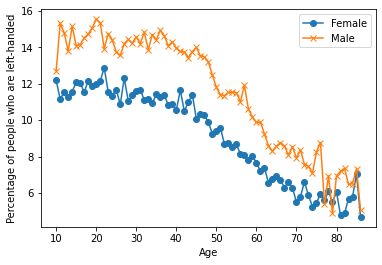

In [10]:
%matplotlib inline
fig, ax = plt.subplots() # create figure and axis objects
ax.plot('Age', 'Female', data = lefthanded_data, marker='o') # plot "Female" vs. "Age"
ax.plot('Age', 'Male', data = lefthanded_data, marker = 'x') # plot "Male" vs. "Age"
ax.legend() # add a legend
ax.set_xlabel("Age")
ax.set_ylabel("Percentage of people who are left-handed")

Add two new columns, one for birth year and one for mean left-handedness, then plot the mean as a function of birth year.
- Create a column in `lefthanded_data` called `Birth_year`, which is equal to 1986 - `Age` (since the study was done in 1986).
- Create a column in `lefthanded_data` called `Mean_lh` which is equal to the mean of the `Male` and `Female` columns.
- Use the `.plot()` method to plot `Mean_lh` vs. `Birth_year`.



In [11]:
# create a new column for birth year of each age
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age'] # the study was done in 1986

# create a new column for the average of male and female
lefthanded_data['Mean_lh'] = lefthanded_data[['Female', 'Male']].mean(axis = 1)

Text(0, 0.5, 'Percentage left-handed')

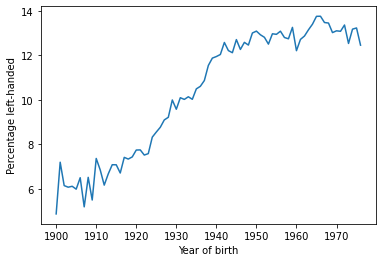

In [12]:
# create a plot of 'Mean_lh' vs. 'Birth_year'
fig, ax = plt.subplots()
ax.plot('Birth_year', 'Mean_lh', data = lefthanded_data)
ax.set_xlabel("Year of birth")
ax.set_ylabel("Percentage left-handed")

## Applying Bayes' rule

We want to calculate the probability of dying at age A given that you're left-handed. Let's write this in shorthand as P(A | LH). We also want the same quantity for right-handers: P(A | RH). 

Here's Bayes' theorem for the two events we care about: left-handedness (LH) and dying at age A.

$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$

<code>P(LH | A)</code> is the probability that you are left-handed given that you died at age A. 

<code>P(A)</code> is the overall probability of dying at age A, 

and <code>P(LH)</code> is the overall probability of being left-handed. We will now calculate each of these three quantities, beginning with P(LH | A).

 

In [13]:
# create a function for P(LH | A)
def P_lh_given_A(ages_of_death, study_year = 1990):
    
    # Use the mean of the 10 neighbouring points for rates before and after the start 
    early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean()
    late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    
    youngest_age = study_year - 1986 + 10 # the youngest age in the NatGeo dataset is 10
    oldest_age = study_year - 1986 + 86 # the oldest age in the NatGeo dataset is 86
    
    P_return = np.zeros(ages_of_death.shape)  # create an empty array to store the results
    
    # extract rate of left-handedness for people of age age_of_death
    P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
 
    return P_return

## When do people normally die?

we'll load in the death distribution data and plot it. The first column is the age, and the other columns are the number of people who died at that age.

Load death distribution data for the United States and plot it.
- Drop the NaN values from the `Both Sexes` column.
- Use the `.plot()` method to plot the number of people who died as a function of their age.



**load death distribution data**


In [14]:
# load death distribution data
death_distribution_data = pd.read_csv('/content/DEATHS_BY_SINGLE_YEARS_OF_AGE.txt', sep='\t', skiprows=[1])

In [15]:
death_distribution_data.tail()

,Age,Both Sexes,Male,Female
120,120,1.0,NaN,1.0
121,121,NaN,NaN,NaN
122,122,NaN,NaN,NaN
123,123,NaN,NaN,NaN
124,124,NaN,NaN,NaN


**Drop the NaN values from the Both Sexes column.**


In [16]:
death_distribution_data = death_distribution_data.dropna(subset = ["Both Sexes"]) # drop NaN from'Both Sexes' column

In [17]:
death_distribution_data.tail()

,Age,Both Sexes,Male,Female
115,115,3.0,NaN,3.0
117,117,3.0,2.0,1.0
118,118,1.0,NaN,1.0
119,119,2.0,NaN,2.0
120,120,1.0,NaN,1.0


**plot number of people who died as a function of age**


Text(0, 0.5, 'Number of people who died')

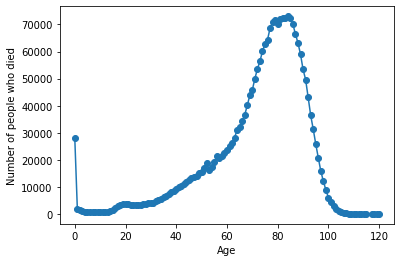

In [18]:
fig, ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data = death_distribution_data, marker='o')
ax.set_xlabel("Age")
ax.set_ylabel("Number of people who died")

## The overall probability of left-handedness

In the previous code block we loaded data to give us P(A), and now we need P(LH). P(LH) is the probability that a person who died in our particular study year is left-handed, assuming we know nothing else about them. This is the average left-handedness in the population of deceased people, and we can calculate it by summing up all of the left-handedness probabilities for each age, weighted with the number of deceased people at each age, then divided by the total number of deceased people to get a probability. In equation form, this is what we're calculating, where N(A) is the number of people who died at age A (given by the dataframe `death_distribution_data`):


< $$P(LH) = \frac{\sum_{\text{A}} P(LH | A) N(A)}{\sum_{\text{A}} N(A)}$$ 

Create a function called `P_lh()` which calculates the overall probability of left-handedness in the population for a given study year.
- Create a series, `p_list`, by multiplying the number of dead people in the `Both Sexes` column with the probability of their being lefthanded using `P_lh_given_A()`. 
- Set the variable `p` equal to the sum of that series.
- Divide `p` by the total number of dead people by summing `death_distribution_data` over the `Both Sexes` column. Return result from the function.

<hr>

N(A) is the value of `Both Sexes` in the `death_distribution_data` DataFrame where the `Age` column is equal to A. The denominator is total number of dead people, which you can get by summing over the entire dataframe in the `Both Sexes` column. 



In [19]:
def P_lh(death_distribution_data, study_year = 1990): # sum over P_lh for each age group
    """ Overall probability of being left-handed if you died in the study year
    P_lh = P(LH | Age of death) P(Age of death) + P(LH | not A) P(not A) = sum over ages 
    Input: dataframe of death distribution data
    Output: P(LH), a single floating point number """
    p_list = death_distribution_data['Both Sexes']*P_lh_given_A(death_distribution_data['Age'], study_year)
    p = np.sum(p_list)
    return p/np.sum(death_distribution_data['Both Sexes']) # normalize to total number of people in distribution

print(P_lh(death_distribution_data))

0.07766387615350638


**Putting it all together**








Now we have the means of calculating all three quantities we need: `P(A)`, `P(LH),` and `P(LH | A).` We can combine all three using Bayes' rule to get `P(A | LH)`.

**We're calculating the following quantity twice, once for left-handers and once for right-handers.**

$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$


First, for left-handers.


In [20]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) # use P_lh function to get probability of left-handedness overall
    P_lh_A = P_lh_given_A(ages_of_death, study_year) # use P_lh_given_A to get probability of left-handedness for a certain age
    return P_lh_A*P_A/P_left

**Putting it all together**

And now for right-handers.

In [21]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're right-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1- P_lh(death_distribution_data, study_year) # either you're left-handed or right-handed, so these sum to 1
    P_rh_A = 1-P_lh_given_A(ages_of_death, study_year) # these also sum to 1 
    return P_rh_A*P_A/P_right

#Plotting the distributions of conditional probabilities

Now that we have functions to calculate the probability of being age A at death given that you're left-handed or right-handed, let's plot these probabilities for a range of ages of death from 6 to 120. 
 

Text(0, 0.5, 'Probability of being age A at death')

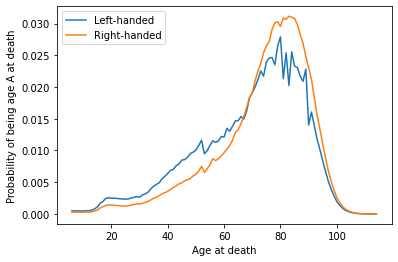

In [22]:
ages = np.arange(6,115,1) # make a list of ages of death to plot

# for each age, calculate the probability of being left- or right-handed
left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

fig, ax = plt.subplots() # create figure and axis objects
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = "Right-handed")
ax.legend()
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")

## Moment of truth: age of left and right-handers at death

Finally, let's compare our results with the original study that found that left-handed people were nine years younger at death on average. We can do this by calculating the mean of these probability distributions in the same way we calculated `P(LH)` earlier, weighting the probability distribution by age and summing over the result.

$$\text{Average age of left-handed people at death} = \sum_A A P(A | LH)$$

$$\text{Average age of right-handed people at death} = \sum_A A P(A | RH)$$

Find the mean age at death for left-handers and right-handers.
- Multiply the `ages` list by the left-handed probabilities of being those ages at death, then use `np.nansum` to calculate the sum. Assign the result to `average_lh_age`.
- Do the same with the right-handed probabilities to calculate `average_rh_age`.
- Print `average_lh_age` and `average_rh_age`.
- Calculate the difference between the two average ages and print it.




To calculate the average age of death for each group, multiply the list of `ages` by the list of probabilities stored in `left_handed_probability` and `right_handed_probability`. The result should be a single number. 

In [23]:
# calculate average ages for left-handed and right-handed groups
# use np.array so that two arrays can be multiplied
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))

# print the average ages for each group
print("Average age of lefthanded: "+ str(round(average_lh_age,2)))
print("Average age of righthanded: " + str(round(average_rh_age,2)))

# print the difference between the average ages
print("The difference in average ages is: " + str(round(average_rh_age - average_lh_age, 2)) + " years.")

Average age of lefthanded: 67.25
Average age of righthanded: 72.79
The difference in average ages is: 5.55 years.


## Final comments

 The reported rates of left-handedness have increased from just **3%** in the early 1900s to about **11%** today, which means that older people are much more likely to be reported as right-handed than left-handed, and so looking at a sample of recently deceased people will have more old right-handers.

Our number is still less than the 9-year gap measured in the study. It's possible that some of the approximations we made are the cause: 

1. We used death distribution data from almost ten years after the study (1999 instead of 1991), and we used death data from the entire United States instead of California alone (which was the original study). 
2. We extrapolated the left-handedness survey results to older and younger age groups, but it's possible our extrapolation wasn't close enough to the true rates for those ages. 

One thing we could do next is figure out how much variability we would expect to encounter in the age difference purely because of random sampling:


**To finish off, let's calculate the age gap we'd expect if we did the study in 2021 instead of in 1990.** 

Redo the calculation from Task 8, setting the `study_year` parameter to 2021.
- In the call to `P_A_given_lh`, set `age_of_death` to `ages`, `death_distribution_data` to `death_distribution_data`, and `study_year` to 2021.
- Do the same for `P_A_given_rh`.



In [25]:
# loop through ages, calculating the probability of being left- or right-handed
left_handed_probability_2021 = P_A_given_lh(ages, death_distribution_data, study_year = 2021)
right_handed_probability_2021 = P_A_given_rh(ages, death_distribution_data, study_year = 2021)
    
# calculate average ages for left-handed and right-handed groups
average_lh_age_2021 =  np.nansum(ages*np.array(left_handed_probability_2021))
average_rh_age_2021 =  np.nansum(ages*np.array(right_handed_probability_2021))

print("The difference in average ages is " + 
      str(round(average_rh_age_2021 - average_lh_age_2021, 1)) + " years.")

The difference in average ages is 1.9 years.


#Conclusion

The gap turns out to be much smaller since rates of left-handedness haven't increased for people born after about 1960. Both the National Geographic study and the 1990 study happened at a unique time - the rates of left-handedness had been changing across the lifetimes of most people alive, and the difference in handedness between old and young was at its most striking. 